1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [48]:
import numpy as np
from scipy import linalg as ln

##Sort Function when comparing eigenvalues and eigenvectors

def sort_matrix(matrix):

  # Sort along rows
  sorted_rows = np.sort(matrix, axis=0)
  # print("Sorted along rows:\n", sorted_rows)

  # Sort along columns
  sorted_cols = np.sort(matrix, axis=1)
  # print("Sorted along columns:\n", sorted_cols)

  # Sort along both rows and columns
  sorted_both = np.sort(np.sort(matrix, axis=0), axis=1)
  # print("Sorted along both rows and columns:\n", sorted_both)
  return sorted_both


# Set the number of data points
N = 1000

# Generate the three variables x1, x2, and x3
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2 * x1 + x2
# Combine the variables into a 3-column matrix
data = np.column_stack((x1, x2, x3))
##Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
cov = np.cov(data.T)

# Find the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov)

# Print the results
print('Eigenvalues:', eigenvalues)
print('Eigenvectors:', eigenvectors)

#Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
data_centered = data - np.mean(data, axis=0)

# Perform SVD on the centered data
U, S, Vt = np.linalg.svd(data_centered)

# Calculate the eigenvalues and eigenvectors from the SVD
eigenvalues_svd = S ** 2 / (len(data) - 1)
eigenvectors_svd = Vt.T

# Print the results
print('Eigenvalues:', eigenvalues_svd)
print('Eigenvectors:', eigenvectors_svd)
# np.allclose(eigenvalues, eigenvalues_svd) and 
if np.allclose(sort_matrix(np.abs(eigenvectors)), sort_matrix(np.abs(eigenvectors_svd))):
    print('The results match!')
else:
    print('The results do not match!')


###


Eigenvalues: [2.77653781e+01 1.17579892e-15 1.92238511e+00]
Eigenvectors: [[-0.11485885 -0.81649658  0.56580984]
 [-0.57811385 -0.40824829 -0.70648263]
 [-0.80783155  0.40824829  0.42513706]]
Eigenvalues: [2.77653781e+01 1.92238511e+00 6.90929401e-31]
Eigenvectors: [[-0.11485885 -0.56580984 -0.81649658]
 [-0.57811385  0.70648263 -0.40824829]
 [-0.80783155 -0.42513706  0.40824829]]
The results match!


In [49]:
##What percent of the total dataset's variability is explained by the principal components? 
# Given how the dataset was constructed, do these make sense? 
# Reduce the dimensionality of the system so that at least 99% of the total variability is retained

# Calculate the total sum of the eigenvalues
total_variability = sum(eigenvalues)

# Calculate the proportion of total variability explained by each component
var_exp = [(i / total_variability) * 100 for i in sorted(eigenvalues, reverse=True)]

# Print the results
print('Proportion of total variability explained by each component:', var_exp)

# Select the first two principal components
pc = eigenvectors[:, :2]

# Project the data onto the first two principal components
projected_data = np.dot(data, pc)

print(projected_data)


Proportion of total variability explained by each component: [93.52465494599521, 6.4753450540047925, 3.960550715284624e-15]
[[-7.67315745e+00 -1.39721902e-16]
 [-1.90106126e+00 -4.03712670e-16]
 [ 2.62777593e-01  4.18378273e-16]
 ...
 [-3.11094697e+00 -1.62376457e-15]
 [ 1.12921117e+01  1.38119624e-15]
 [-2.28781638e+00 -1.00802830e-15]]


In [76]:
from sklearn.decomposition import PCA
# Define the data
data = np.column_stack((x1, x2, x3))

# Subtract the mean of the data
data_centered = data - np.mean(data, axis=0)

# Calculate the principal components and transform the data
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_centered)

# Redefine the data according to the new basis from the PCA
data_redefined = np.dot(data_centered, pca.components_.T)

In [77]:
pca.components_.T

array([[-0.11485885, -0.56580984, -0.81649658],
       [-0.57811385,  0.70648263, -0.40824829],
       [-0.80783155, -0.42513706,  0.40824829]])

In [78]:
print("Original data: ",data.shape)
print("New data: ",data_redefined.shape)

Original data:  (1000, 3)
New data:  (1000, 3)


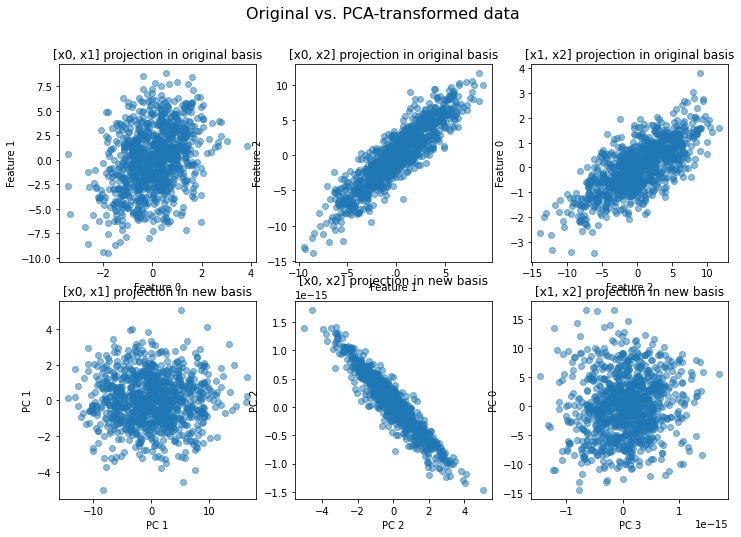

In [79]:
import matplotlib.pyplot as plt

# Original data plot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
fig.suptitle('Original vs. PCA-transformed data', fontsize=16)

# Subplot titles
titles = ['[x0, x1]', '[x0, x2]', '[x1, x2]']

# Scatter plot of original data
for i in range(3):
    axs[0, i].scatter(data[:, i], data[:, (i+1)%3], alpha=0.5)
    axs[0, i].set_title(titles[i] + ' projection in original basis')
    axs[0, i].set_xlabel('Feature {}'.format(i))
    axs[0, i].set_ylabel('Feature {}'.format((i+1)%3))

# PCA-transformed data plot
for i in range(3):
    axs[1, i].scatter(data_redefined[:, i], data_redefined[:, (i+1)%3], alpha=0.5)
    axs[1, i].set_title(titles[i] + ' projection in new basis')
    axs[1, i].set_xlabel('PC {}'.format(i+1))
    axs[1, i].set_ylabel('PC {}'.format((i+1)%3))

plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [88]:
import numpy as np

# Generate 10 new columns of random noise with mean 0 and std 0.05
noise = np.random.normal(loc=0, scale=0.05/20, size=(1000, 10))

# Add the noise to the existing data
data_with_noise = np.hstack((data_redefined, noise))
print(data_with_noise.shape)

(1000, 24)


In [89]:
from sklearn.decomposition import PCA

# Initialize PCA object with 3 components
pca = PCA(n_components=3)

# Fit the PCA model to the data
pca.fit(data_with_noise)

# Transform the data to the new basis
data_with_noise_reduced = pca.transform(data_with_noise)


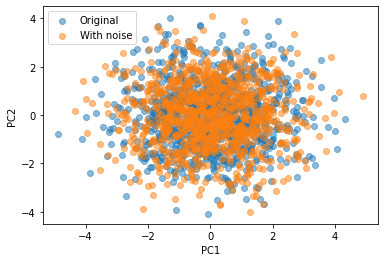

In [90]:
import matplotlib.pyplot as plt

# Scatter plot of original data
plt.scatter(data_redefined[:, 0], data_redefined[:, 1], alpha=0.5, label='Original')

# Scatter plot of noisy data
plt.scatter(data_with_noise_reduced[:, 0], data_with_noise_reduced[:, 1], alpha=0.5, label='With noise')

# Plot formatting
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [91]:
# get the dataset and its description on the proper data directory
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [98]:
##Reading the data!
import pandas as pd

# Read the CSV file
df = pd.read_csv('data/magic04.data', header=None)

# Set the column names
df.columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans',  'fAlpha', 'fDist', 'class']


In [99]:
##Performing PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Split features and target
X = df.drop('class', axis=1).values
y = df['class'].values

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

# Access principal components
principal_components = pca.components_


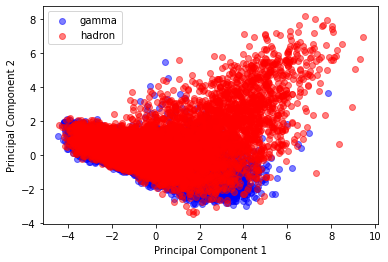

In [106]:
###Visualizing!
import matplotlib.pyplot as plt

plt.scatter(X_pca[y=='g', 0], X_pca[y=='g', 1], color='blue',alpha=0.5, label='gamma')
plt.scatter(X_pca[y=='h', 0], X_pca[y=='h', 1], color='red',alpha=0.5, label='hadron')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()